# Imports

In [35]:
#Import FISHscale
import sys
sys.path.insert(0, "/home/lars/storage/Documents/")#FISHscale/")
from FISHscale.utils import dataset

#Import other libraries
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.collections import LineCollection
import numpy as np
import pickle

# Load data
Data can be loaded from .csv or .parquet files, where .parquet files are the most efficient. These files should at least have a column for the X and Y coordinates of the points and a colum with gene names. The names of these columns can be passed to the loading function with the parameters: `x_label`, `y_label` & `gene_label`. Other colums can be loaded using the `other_columns` parameter.  

  
The unit is also handled explicitly by giving the unit scale using the `pixel_size` parameter. For our data the XY coordinates are in pixel units which are 0.18 micrometer. Change it according to the settings of your system. If your data is already in a specific unit you can just pass this, like `1 micrometer` or `1_meter`.

The color of the genes can be predefined by giving a dictionary with colors as input. If not defined, FISHscale will generate a new color dictionary and save it fot later use.
  
The first time you load a dataset the data will be parsed which can take some time. However, the next time you load it, it will be fast.

In [2]:
file_name = '/home/lars/storage/Documents/FISHscale/Example_data/Mouse_448_example_data.parquet'
color_dictionary = pickle.load(open('/home/lars/storage/Documents/FISHscale/Example_data/Mouse_448_color_dict.pkl', 'rb'))

d = dataset.Dataset(file_name,
                    gene_label = 'decoded_genes',
                    pixel_size = '0.18 micrometer',
                    color_input = color_dictionary,
                    verbose = True)

    Loaded: Mouse_448_example_data


You can inspect your data by quickly plotting a few genes.

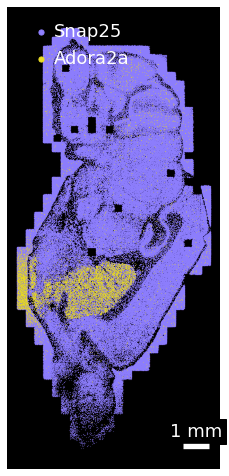

In [3]:
d.scatter_plot(['Snap25', 'Adora2a'], s=0.01)

# Data manipulation
We see that it would be better if the dataset would be flipped. below the options for this are shown

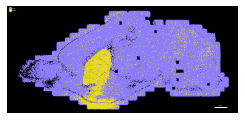

In [4]:
d.transpose()
d.scatter_plot(['Snap25', 'Adora2a'], s=0.01, ax_scale_factor=5)

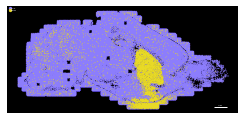

In [41]:
d.flip_x()
d.scatter_plot(['Snap25', 'Adora2a'], s=0.01, ax_scale_factor=5)

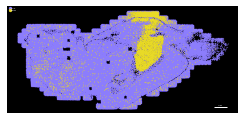

In [42]:
d.flip_y()
d.scatter_plot(['Snap25', 'Adora2a'], s=0.01, ax_scale_factor=5)

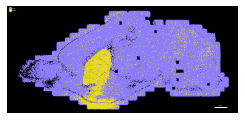

In [43]:
#Reset to best orientation
d.flip_y()
d.flip_x()
d.scatter_plot(['Snap25', 'Adora2a'], s=0.01, ax_scale_factor=5)

# FISHscale attributes
The FISHscale object stores some usefull attributes that can be used for analysis. See examples below

In [98]:
print('Full path to the file ', d.filename)
print('Folder where the file is located ', d.dataset_folder)
print('Name of the dataset ', d.dataset_name)
print('Folder where the parsed data and FISHscale metadata can be found ', d.FISHscale_data_folder) 

Full path to the file  /home/lars/storage/Documents/FISHscale/Example_data/Mouse_448_example_data.parquet
Folder where the file is located  /home/lars/storage/Documents/FISHscale/Example_data
Name of the dataset  Mouse_448_example_data
Folder where the parsed data and FISHscale metadata can be found  /home/lars/storage/Documents/FISHscale/Example_data/Mouse_448_example_data_FISHscale_Data


In [108]:
#Dataset spatial metadata
print('x min ', d.x_min)
print('x max ', d.x_max)
print('x extent ', d.x_extent)
print('y min ', d.y_min)
print('y max ', d.y_max)
print('y extent ', d.y_extent)
print('z coordinate ', d.z)
print('x offset ', d.x_offset)
print('y offset ', d.y_offset)
print('z offset ', d.z_offset)
print('xy center ', d.xy_center)
print('area of one pixel ', d.pixel_area)
print('size of one pixel ', d.pixel_size)
print('unit scale ', d.unit_scale)

x min  -367.02
x max  15938.634219128904
x extent  16305.654219128905
y min  -11.16
y max  7489.207877534156
y extent  7500.367877534156
z coordinate  0
x offset  0
y offset  0
z offset  0
xy center  (7785.807109564452, 3739.023938767078)
area of one pixel  0.0324 micrometer ** 2
size of one pixel  0.18 micrometer
unit scale  1 micrometer


In [101]:
#All genes (showing only the first 10)
d.unique_genes[:10]

array(['2010300C02Rik', 'A830009L08Rik', 'Abi3bp', 'Ache', 'Acta2',
       'Adamts5', 'Adarb2', 'Adcyap1', 'Adora2a', 'Agrp'], dtype=object)

In [105]:
#Color dictionary with RGB colors for all genes (showing only one gene)
d.color_dict['Aqp4']

(1.0, 0.8136363636363644, 0.5)

In [110]:
#Total number of molecules and columns
d.shape

(12130261, 4)

In [112]:
#Dictionary with numer of molecules per gene (showing only one gene)
d.gene_n_points['Aqp4']

27829

# FISHscale data storage
All data is stored on disk to keep it memory efficient. To acces the data of a gene use the `get_gene()` function

In [113]:
d.get_gene('Aqp4')

x            y
7191      6863.299159  7173.127878
10603     7107.559159  7390.927878
17595     6824.239159  7186.627878
18415     7087.939159  7315.687878
18428     6864.919159  7157.107878
...               ...          ...
12127533  5154.501868   125.274395
12127554  5372.121868   232.194395
12127577  5380.941868   263.874395
12127584  5168.721868   151.014395
12127615  5382.561868   135.354395

[27829 rows x 2 columns]

# Data visualization
## Interactive visualization
Interactively visualize your data in 3D is a powerfull way to inspect large datasets. Use the second window to select one or multiple genes.
Quick tips:
- Use + and - keys to increase or decrease dot size.  
- Ctrl/Comand and mouse to move the dataset.
- Key "r" to reset the view.
- Key "h" for all options.

In [26]:
d.visualize()

Single Dataset
/home/lars/storage/Documents/FISHscale/Example_data/Mouse_448_example_data.parquet
Data loaded


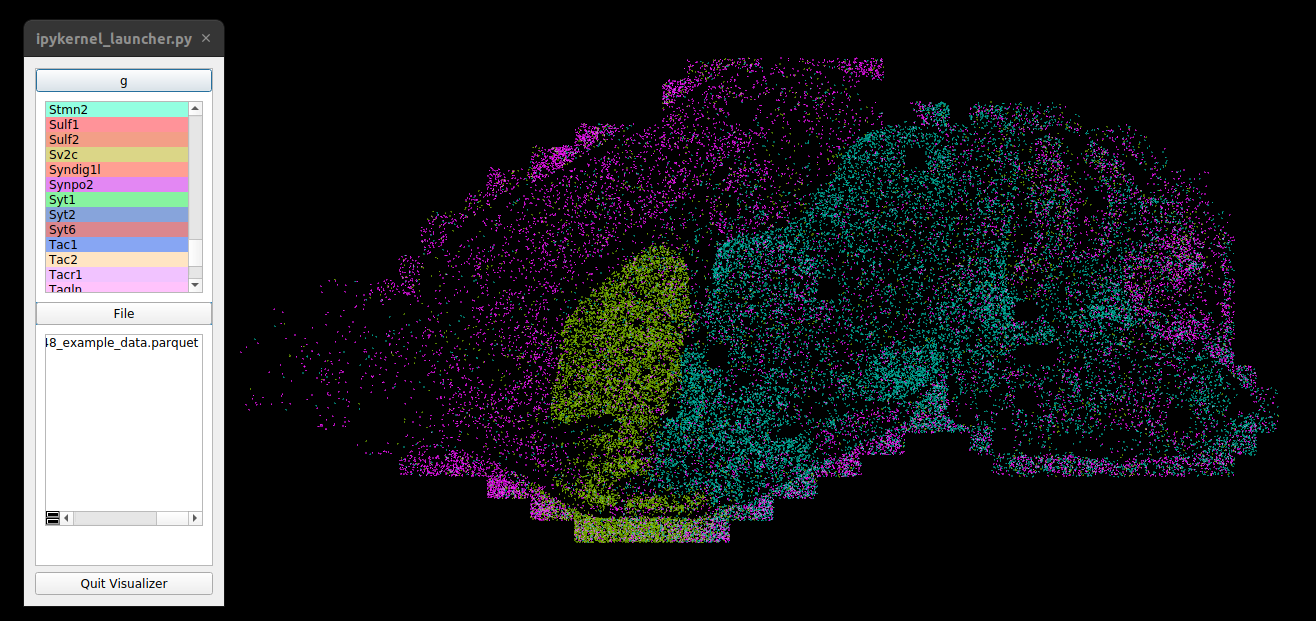

## Plotting and saving figures
Saving plots with large number of dots as vectors creates large figures and takes time. The FISHscale plotting function rasterizes the dots to save space.

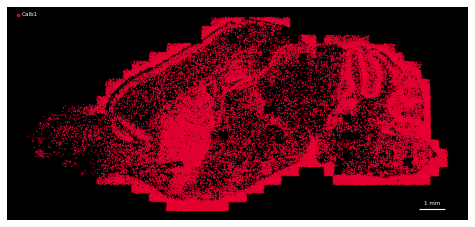

In [44]:
#Plot a single gene
d.scatter_plot('Calb1')

The scale of the plot is defined by the actual size of the data and is controlled by the `ax_scale_factor` parameter.  
The default value is 10, which means that if you save the figure, the data should be 10 times as large as the original dataset. 

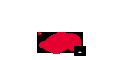

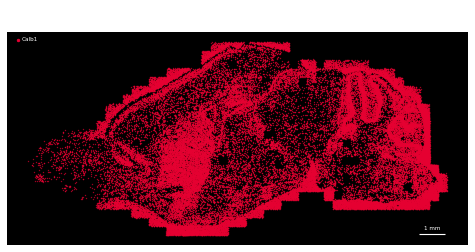

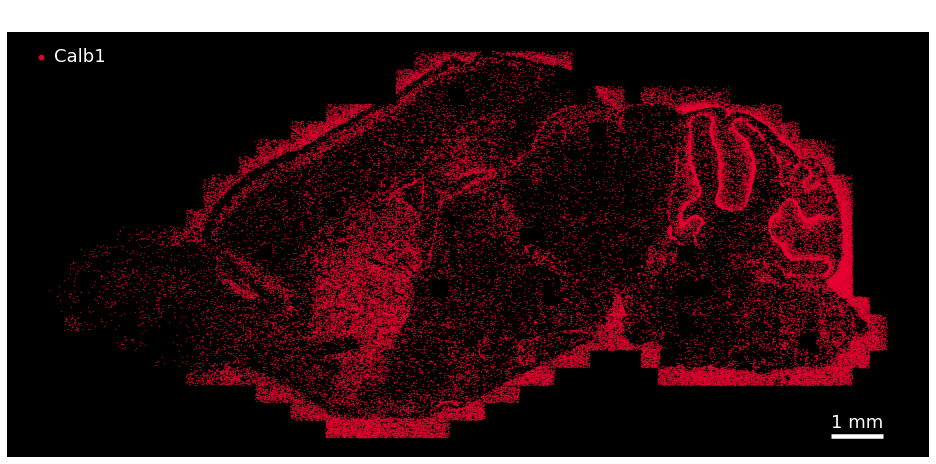

In [47]:
d.scatter_plot('Calb1', ax_scale_factor=1, title='Real size')
d.scatter_plot('Calb1', ax_scale_factor=10, title='10X size')
d.scatter_plot('Calb1', ax_scale_factor=20, title='20X size')

Can not add the legend for more than 15 genes. Please see self.color_dict for gene colors.


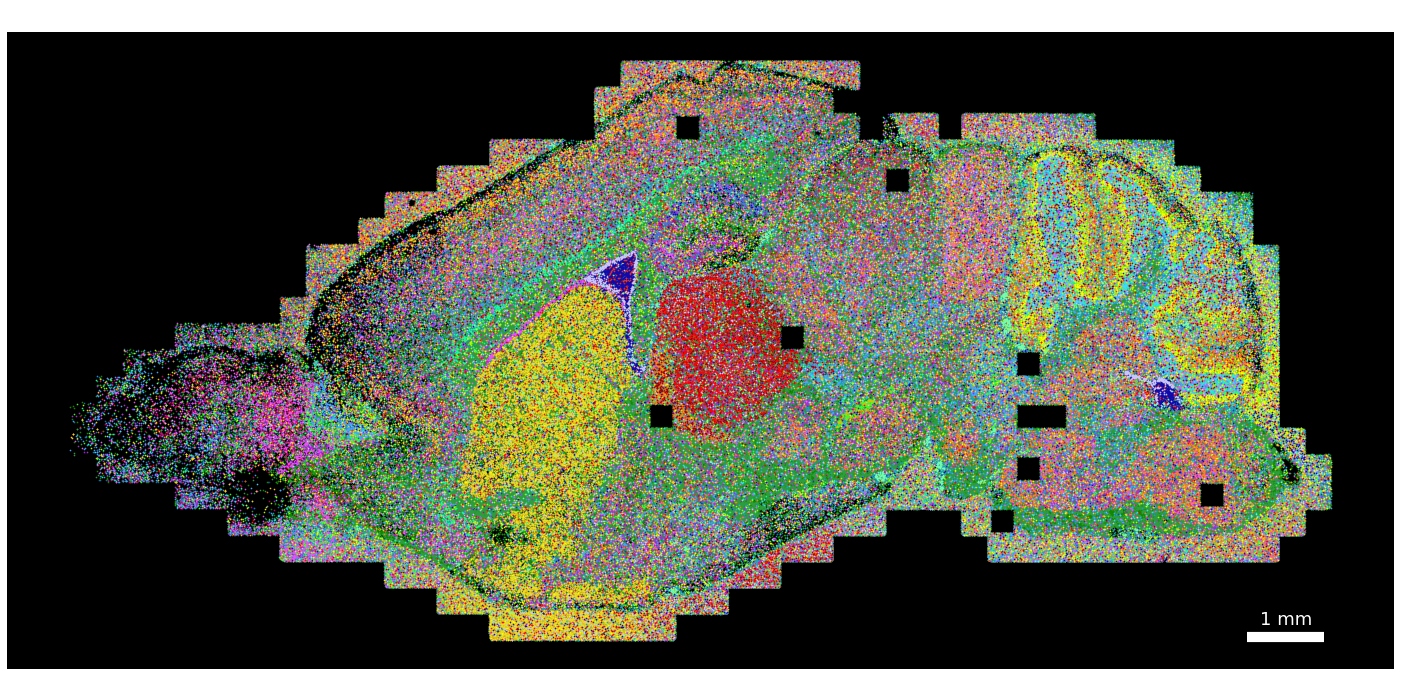

In [56]:
#Plot a list of genes in the given order (Remake of figure 1)
selected_genes = ['Cplx1', 'Mbp', 'Plp1', 'Nefh', 'Stac2', 'Cpne4','Cbln1', 
                  'Calb2', 'Pvalb', 'Gabra6', 'Vim', 'Neurod6', 'Lamp5', 'Rprm',
                  'Cplx3', 'Rasgrf2', 'Sox6', 'Dlx1', 'Th', 'Drd2', 'Adora2a',
                  'Gdf10', 'Dcn', 'Foxj1', 'Kl', 'Lef1', 'Ramp3', 'Synpo2', 
                  'Ccdc153', 'Tagln']
d.scatter_plot(selected_genes, s=0.4, ax_scale_factor=30, title='30 selected genes')

Saving the plot can be done like so:

In [ ]:
d.scatter_plot(selected_genes, 
               s=0.4, 
               ax_scale_factor=30, 
               title='30 selected genes',
               
               save = True,
               save_name = 'Test_plot',
               dpi = 300,
               file_format = '.pdf')        

The legend can be added for up to 15 genes, beyond that you can use the color dictionary to make the legend.

In [55]:
for gene in selected_genes:
    print(f'Gene: {gene :10} RGB color: {d.color_dict[gene]}')

Gene: Cplx1      RGB color: (0.09803921568627451, 0.4549019607843137, 0.6509803921568628)
Gene: Mbp        RGB color: (0.0784313725490196, 0.5411764705882353, 0.00392156862745098)
Gene: Plp1       RGB color: (0.1803921568627451, 0.6196078431372549, 0.24705882352941178)
Gene: Nefh       RGB color: (0.6627450980392157, 0.19607843137254902, 0.8196078431372549)
Gene: Stac2      RGB color: (1.0, 0.38823529411764707, 0.9686274509803922)
Gene: Cpne4      RGB color: (0.8, 0.0, 0.4117647058823529)
Gene: Cbln1      RGB color: (0.09803921568627451, 0.596078431372549, 1.0)
Gene: Calb2      RGB color: (0.25098039215686274, 0.6627450980392157, 1.0)
Gene: Pvalb      RGB color: (1.0, 0.5058823529411764, 0.09803921568627451)
Gene: Gabra6     RGB color: (0.25098039215686274, 0.8509803921568627, 1.0)
Gene: Vim        RGB color: (0.6823529411764706, 1.0, 0.0)
Gene: Neurod6    RGB color: (0.27058823529411763, 0.4823529411764706, 0.8509803921568627)
Gene: Lamp5      RGB color: (1.0, 0.5098039215686274, 0.07

It is also possible to zoom in by using the `view` input

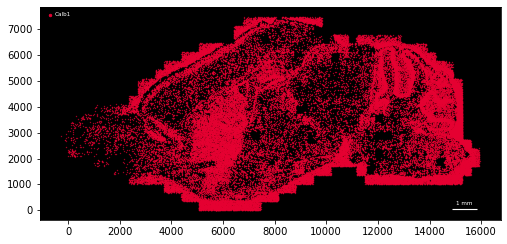

In [57]:
#First it is usefull to see the axes
d.scatter_plot('Calb1', show_axes=True)

Can not add the legend for more than 15 genes. Please see self.color_dict for gene colors.


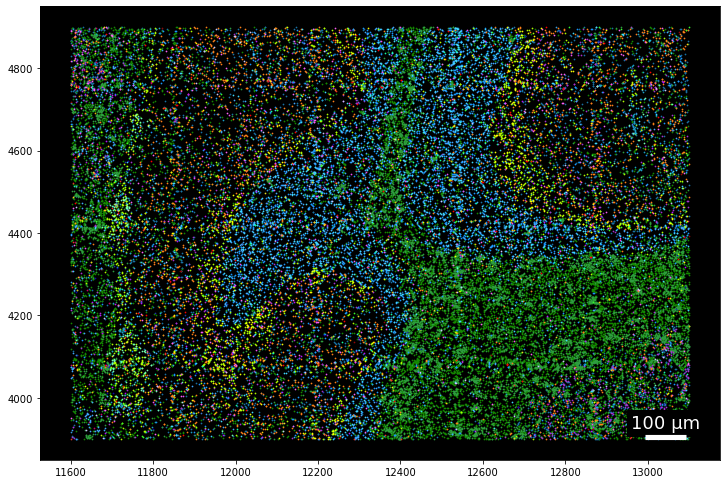

In [59]:
bottom_left = [11600, 3900]
top_right = [13100, 4900]
view = [bottom_left, top_right]

d.scatter_plot(selected_genes, view = view, ax_scale_factor=160, s=0.5, show_axes=True)

You can also plot all genes althogh this might take slightly more time.  
It is also possible to change the color of individual genes

In [73]:
custom_colors = [d.color_dict[gene] for gene in d.unique_genes]
#Set Calb1 to white
custom_colors[np.where(d.unique_genes == 'Calb1')[0][0]] = (1, 1, 1)

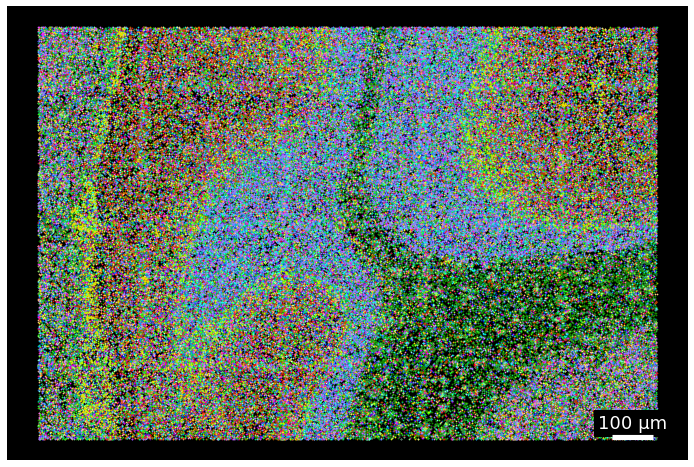

In [84]:
custom_colors = [d.color_dict[gene] for gene in d.unique_genes]
#Set Car8 to white
custom_colors[np.where(d.unique_genes == 'Car8')[0][0]] = (1, 1, 1)


d.scatter_plot(d.unique_genes, view = view, ax_scale_factor=160, s=0.5, colors = custom_colors, show_axes=False, show_legend=False)

It might be usefull to order the genes so that the most spatially defined genes are plot on top

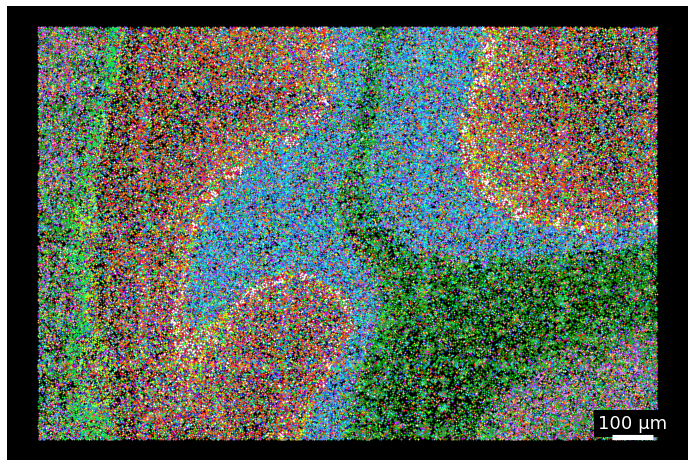

In [85]:
#Sort genes by the Gini coefficient
gene_order = d.sort_genes_by_gini(spacing=200, min_count=10)

#Prepare custom colors in same order as the new gene_order
custom_colors = [d.color_dict[gene] for gene in gene_order]
#Set Car8 to white
custom_colors[np.where(gene_order == 'Car8')[0][0]] = (1, 1, 1)

d.scatter_plot(gene_order, view = view, ax_scale_factor=160, s=0.5, colors = custom_colors, show_axes=False, show_legend=False)

# Hexagonal binning
Bin the data with hexagonal bins.

In [114]:
df_hex, coordinates = d.hexbin_make(spacing=75, min_count=10)
df_hex.head(5)

Show the hexagonal bins with the `hexbin_plot()` function

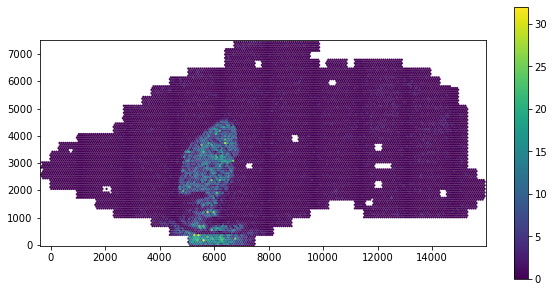

In [118]:
d.hexbin_plot(c=df_hex.loc['Adora2a'], figsize=(10,5))

# Regionalization

In [12]:
df_hex, labels, hex_coord, df_mean, df_norm = d.regionalize(spacing=75, 
                                                            min_count=10, 
                                                            n_components=[0,90],                                                        
                                                            clust_dist_threshold=100,
                                                            n_clusters = None,
                                                            clust_neighbor_rings=1)

/home/lars/anaconda3/envs/eel2/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


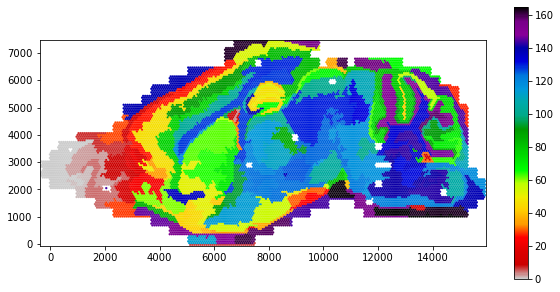

In [14]:
d.hexbin_plot(labels, cm=plt.cm.nipy_spectral_r, figsize=(10, 5))

# Mix regions
Mix the colors of the regionalization results based on the probability of cluster identity.

Perfect matches: 15846 out of 16521 which is 96% accuracy


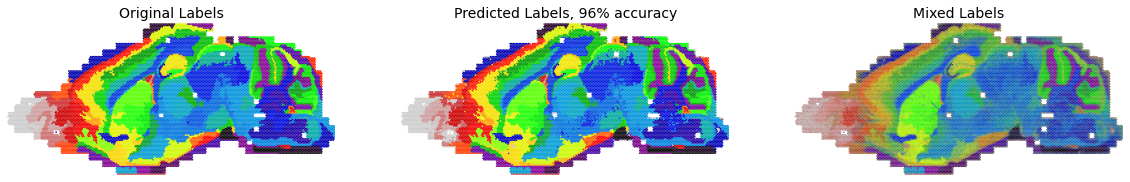

In [15]:
mix_color, predicted_prob, predicted_labels, color_dict = d.regionalization_gradient_make(df_hex, labels, max_depth=14)

(-389.1928904355477, 15960.807109564452, -65.68656769523037, 7478.782539945553)

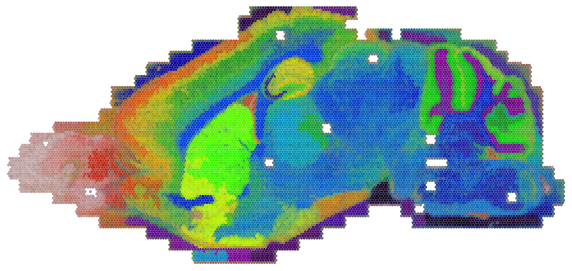

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
    
d.hexbin_plot(mix_color, ax = ax)
plt.axis('off')

# Borders
Calculating borders can take some time, For this example the parameters are less dense than used for the paper.  
Paper parameters: `d.boundaries_make(bin_size=50, n_angles=12, radius=250, normalize=True, normalization_mode='log')`

In [28]:
borders, grid, grid_filt, filt_grid = d.boundaries_make(bin_size=100, n_angles=6, radius=250, normalize=True, normalization_mode='log')

[########################################] | 100% Completed |  3min 58.7s


/home/lars/storage/Documents/FISHscale/spatial/boundaries.py:241: RuntimeWarning: invalid value encountered in true_divide
  stack = np.stack(results_angle_counts)
/home/lars/storage/Documents/FISHscale/spatial/boundaries.py:242: RuntimeWarning: invalid value encountered in true_divide
  cm_repeat = np.repeat(count_matrix[:,:,np.newaxis], n_angles, axis=2)


[########################################] | 100% Completed |  7.5s


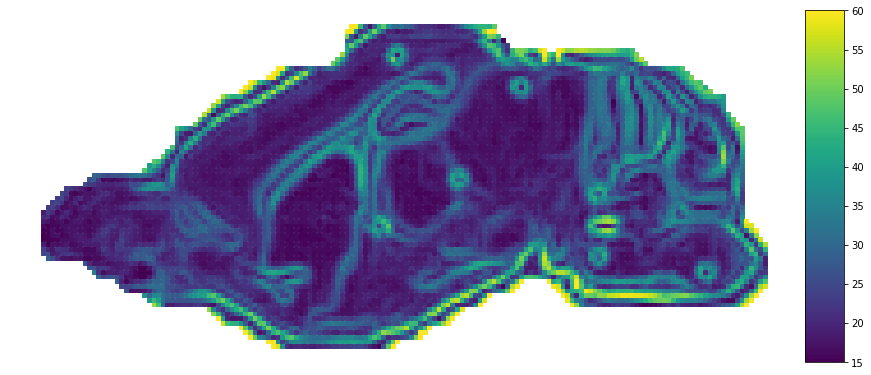

In [31]:
fig, ax = plt.subplots(figsize=(15,10))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

scatt = ax.scatter(grid_filt[:,0], grid_filt[:,1], c = borders[:,0], s=16, marker='s', vmin=15, vmax=60, cmap=plt.cm.viridis)
plt.colorbar(scatt, cax=cax)
ax.set_aspect('equal')
ax.axis('off');

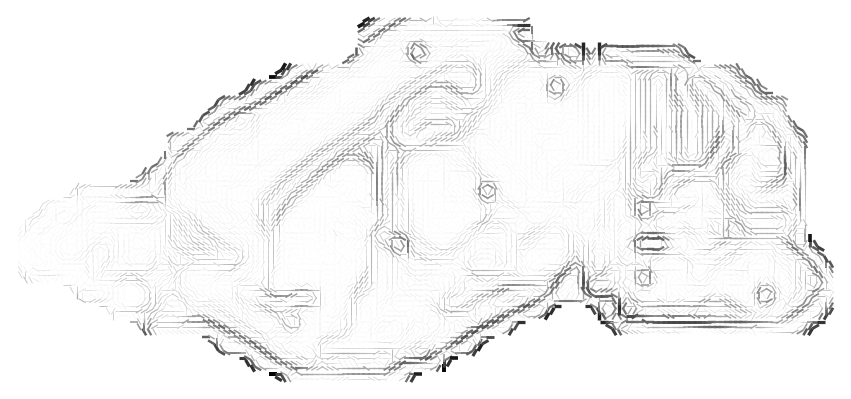

In [38]:
#Make lines at every grid point
lines = [d.bisect(75, a, g) for a,g in zip(borders[:,1], grid_filt)]
xy= np.array(lines)

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlim(d.x_min, d.x_max)
ax.set_ylim(d.y_min, d.y_max)

#Get the magnitude of the border at every position
values = borders[:,0]
values = values - values.min()
values = values / values.max()
values_inv = 1-values

#Color lines by magnitude
colors = plt.cm.gray(values_inv)

line_segments = LineCollection(xy, linestyle='solid', colors=colors, linewidths=values*4) 
ax.add_collection(line_segments)
ax.set_aspect('equal')
ax.axison=False